In [2]:
import sys
from glob import glob

import time
import h5py
import zarr
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du

In [4]:
from datetime import datetime, timedelta
import subprocess

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
lead = 21

In [7]:
print('Investigating lead{}'.format(lead))

HRRRv3_lead = zarr.load(save_dir_scratch+'HRRR_{:02}_v3.zarr'.format(lead))
#HRRRv3_lead = np.zeros((872, 1059, 1799, 23)) # use fake data for a quick test

Investigating lead21


In [8]:
with h5py.File(save_dir_scratch+'SPC_all_lead{}.hdf'.format(lead), 'r') as h5io:
    record_v3 = h5io['record_v3'][...]

In [11]:
HRRRv3_lead.shape

(872, 1059, 1799, 23)

In [12]:
# UH 2-5 is the 4th-indexed variable
HRRR_v3_UH25 = np.copy(HRRRv3_lead[..., 4])

In [13]:
with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]
    lon_72km = h5io['lon_72km'][...]
    lat_72km = h5io['lat_72km'][...]

In [14]:
from scipy.spatial import cKDTree

In [19]:
grid_shape_3km = lon_3km.shape
grid_shape = record_v3.shape

In [27]:
grid_shape_3km

(1059, 1799)

In [15]:


gridTree = cKDTree(list(zip(lon_3km.ravel(), lat_3km.ravel()))) #KDTree_wraper(xgrid, ygrid)

        
# dist, indexes = gridTree.query(list(zip(np.array(temp_lon)[None], np.array(temp_lat)[None])))
# indx_3km, indy_3km = np.unravel_index(indexes, grid_shape_hrrr)

# indx_array[xi, yi] = indx_3km[0]
# indy_array[xi, yi] = indy_3km[0]

In [25]:
half_margin = 64

In [57]:

UH_max = []
UH_vals = []

for f in range(int(grid_shape[-1]/2)):
    lon_temp = record_v3[:, 2*f]
    lat_temp = record_v3[:, 2*f+1]
    
    flag_nan = np.logical_not(np.isnan(lon_temp + lat_temp))
    
    lon_temp = lon_temp[flag_nan]
    lat_temp = lat_temp[flag_nan]
    L = len(lon_temp)
    if L > 1:
        dist, indexes = gridTree.query(list(zip(np.array(lon_temp), np.array(lat_temp))))
        indx_3km, indy_3km = np.unravel_index(indexes, grid_shape_3km)

        for l in range(L):
            x_edge_left = indx_3km[l] - half_margin
            x_edge_right = indx_3km[l] + half_margin

            y_edge_bottom = indy_3km[l] - half_margin
            y_edge_top = indy_3km[l] + half_margin

            if x_edge_left >= 0 and y_edge_bottom >= 0 and x_edge_right <= grid_shape_3km[0] and y_edge_top <= grid_shape_3km[1]:
                uh_temp = HRRRv3_lead[l, x_edge_left:x_edge_right, y_edge_bottom:y_edge_top, 3]
                if np.logical_not(np.isnan(np.max(uh_temp))):
                    UH_vals.append(np.sum(uh_temp > 0.0))
                    UH_max.append(np.max(uh_temp))

In [48]:
UH_vals = np.array(UH_vals)

In [49]:
UH_vals

array([3115, 1093, 2383, ..., 1735, 2256, 1788])

In [34]:
UH_vals_clean = UH_vals[~np.isnan(UH_vals)]

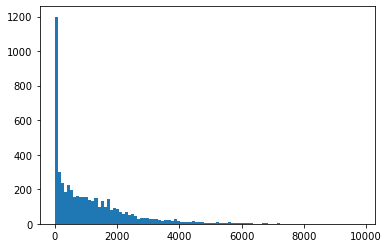

In [55]:
plt.hist(UH_vals, bins=100);

In [56]:
np.sum(UH_vals > 10)

4438

In [63]:
np.sum(np.array(UH_vals) > 1)

3648

In [65]:
UH_vals

[1772,
 176,
 473,
 81,
 0,
 0,
 904,
 1832,
 1354,
 0,
 1792,
 290,
 2926,
 0,
 105,
 1257,
 112,
 3,
 55,
 3372,
 376,
 2005,
 64,
 1040,
 1865,
 2304,
 233,
 1519,
 104,
 210,
 94,
 1817,
 1907,
 2720,
 651,
 377,
 2313,
 40,
 0,
 1217,
 1,
 6,
 4432,
 558,
 0,
 45,
 2011,
 110,
 434,
 0,
 261,
 908,
 189,
 366,
 520,
 0,
 0,
 360,
 0,
 6,
 27,
 7,
 1500,
 169,
 9,
 0,
 0,
 0,
 0,
 0,
 2862,
 0,
 1110,
 0,
 427,
 2075,
 1714,
 1711,
 0,
 592,
 270,
 64,
 106,
 30,
 571,
 1534,
 265,
 235,
 0,
 36,
 371,
 0,
 47,
 0,
 0,
 4,
 0,
 0,
 2,
 63,
 5196,
 0,
 2,
 1240,
 0,
 0,
 164,
 0,
 2283,
 0,
 4832,
 2024,
 1809,
 26,
 2,
 1957,
 19,
 0,
 356,
 87,
 0,
 95,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 32,
 4178,
 124,
 0,
 2,
 0,
 305,
 3,
 0,
 0,
 0,
 0,
 844,
 0,
 0,
 0,
 0,
 918,
 0,
 0,
 0,
 416,
 823,
 214,
 0,
 0,
 0,
 8726,
 1896,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 75,
 0,
 6163,
 156,
 2407,
 26,
 596,
 504,
 0,
 184,
 0,
 0,
 3208,
 162,
 41,
 0,
 161,
 0,
 0,
 0,
 0,
 0,
 779,
 423,
 51,
 12